# Import the relevant modules and format the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

dmd = pd.read_csv('VIC2014-2021.csv',index_col=[0], parse_dates=[0])
dmd

,Demand,Price
Datetime,,
2014-01-01 00:30:00,4656.030000,44.040000
2014-01-01 01:00:00,4373.040000,41.440000
2014-01-01 01:30:00,4175.320000,37.100000
2014-01-01 02:00:00,4003.350000,33.790000
2014-01-01 02:30:00,3841.740000,20.410000
...,...,...
2021-12-31 21:30:00,5657.276667,87.200000
2021-12-31 22:00:00,5407.026667,123.723333
2021-12-31 22:30:00,5291.213333,120.326667


In [2]:
import warnings
warnings.filterwarnings("ignore")

### Draw a Demand image for 2014-2021

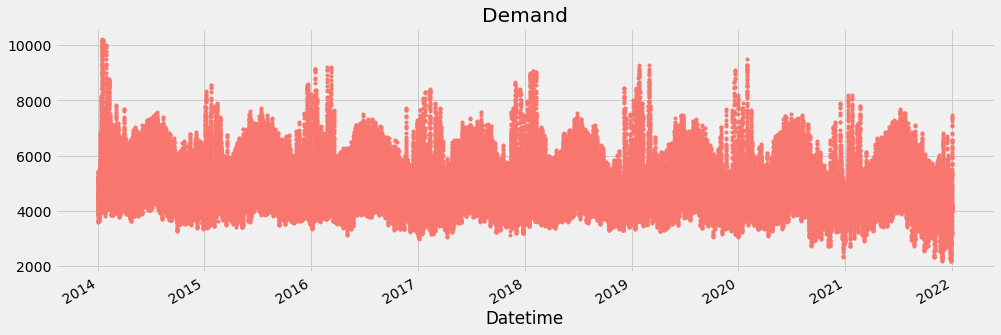

In [3]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # For plots
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
dmd['Demand'].plot(style='.', figsize=(15,5), color=color_pal[0], title='Demand')
plt.savefig('C:/Users/HP/Desktop/fig1.png')
plt.show()

### Resample the dataset

In [4]:
dmd1=dmd
dmd1['date'] = dmd.index
dmd1['hour'] = dmd.index.hour
dmd1['dayofweek'] = dmd.index.dayofweek
dmd1['quarter'] = dmd.index.quarter
dmd1["year"] = dmd.index.year
dmd1["mon"] = dmd.index.month
dmd1['dayofyear'] = dmd.index.dayofyear
dmd1['dayofmonth'] = dmd.index.day
dmd1['weekofyear'] = dmd.index.weekofyear
features_and_target = dmd1.drop(labels='Price',axis=1)
features_and_target

,Demand,date,hour,dayofweek,quarter,year,mon,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,,
2014-01-01 00:30:00,4656.030000,2014-01-01 00:30:00,0,2,1,2014,1,1,1,1
2014-01-01 01:00:00,4373.040000,2014-01-01 01:00:00,1,2,1,2014,1,1,1,1
2014-01-01 01:30:00,4175.320000,2014-01-01 01:30:00,1,2,1,2014,1,1,1,1
2014-01-01 02:00:00,4003.350000,2014-01-01 02:00:00,2,2,1,2014,1,1,1,1
2014-01-01 02:30:00,3841.740000,2014-01-01 02:30:00,2,2,1,2014,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
2021-12-31 21:30:00,5657.276667,2021-12-31 21:30:00,21,4,4,2021,12,365,31,52
2021-12-31 22:00:00,5407.026667,2021-12-31 22:00:00,22,4,4,2021,12,365,31,52
2021-12-31 22:30:00,5291.213333,2021-12-31 22:30:00,22,4,4,2021,12,365,31,52


<Figure size 12000x6400 with 0 Axes>

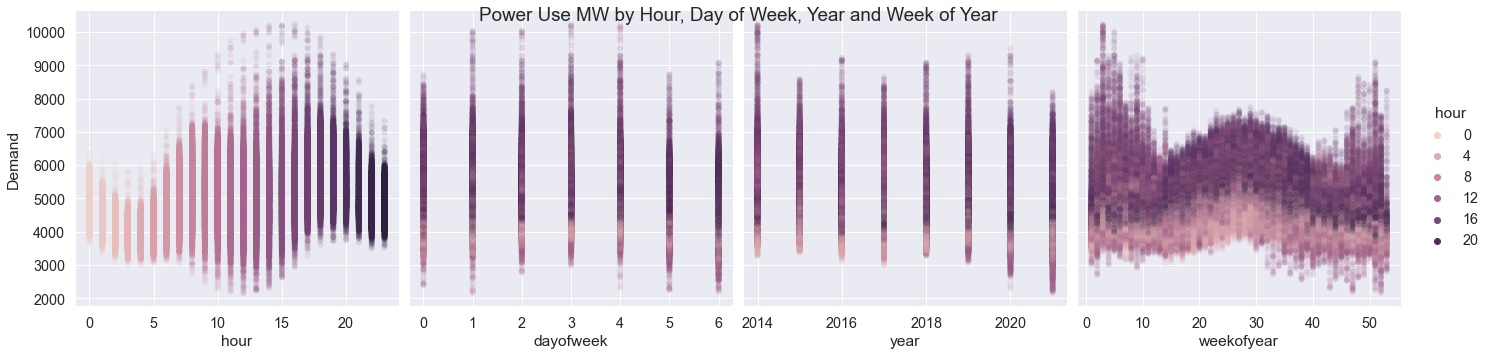

In [5]:
plt.figure(figsize=(30,16),dpi=400)
sns.set(font_scale=1.3)
sns.pairplot(features_and_target.dropna(),
             hue='hour',
             x_vars=['hour','dayofweek',
                     'year','weekofyear'],
             y_vars='Demand',
             height=5,
             plot_kws={'alpha':0.1, 'linewidth':0}
            )
plt.suptitle('Power Use MW by Hour, Day of Week, Year and Week of Year')
plt.savefig('C:/Users/HP/Desktop/fig11.png')
plt.show()

### Split the data into training set and testing set

In [6]:
dmd = dmd.drop(['Price'],axis=1)
split_date = '01-Jan-2021'
demand_train = dmd['Demand'].loc[dmd.index <= split_date].copy()
demand_test = dmd['Demand'].loc[dmd.index > split_date].copy()

### Draw the image of the training and testing set

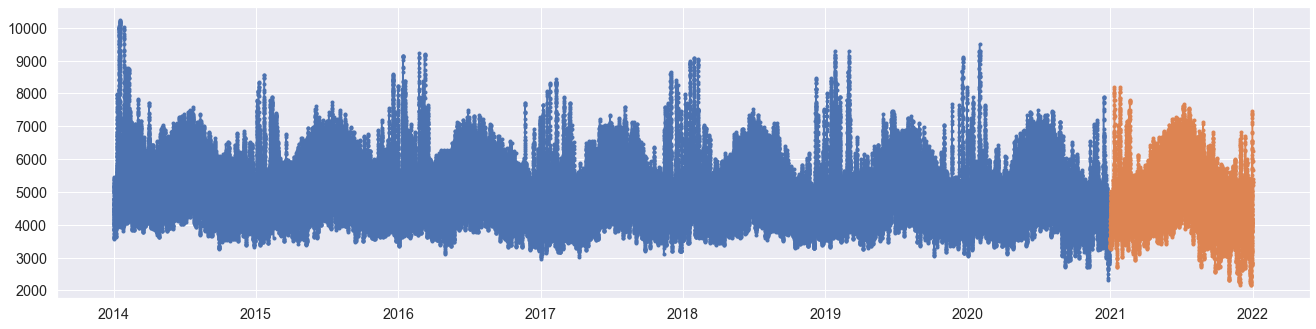

In [7]:
plt.figure(figsize=(20,5))
plt.plot(demand_train.index, demand_train.values, label="demand_train",marker='.')
plt.plot(demand_test.index, demand_test.values, label="demand_test",marker='.')
plt.savefig('C:/Users/HP/Desktop/fig2.png')

### Create a model and import the training set to plot the prediction results (blue part)，The light blue part is the acceptable interval

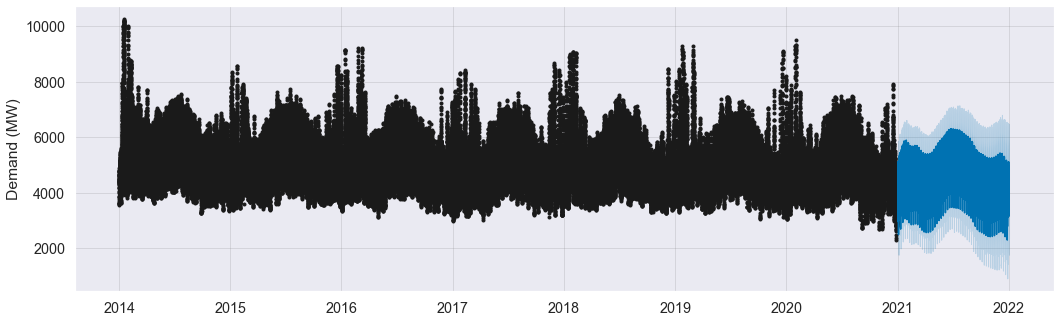

In [8]:
demand_train.reset_index().rename(columns={'Datetime':'ds','Demand':'y'})
model = Prophet()
model.fit(demand_train.reset_index().rename(columns={'Datetime':'ds','Demand':'y'}))
demand_test_fcst = model.predict(df=demand_test.reset_index().rename(columns={'Datetime':'ds'}))
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(demand_test_fcst,ax=ax)
ax.set_ylabel('Demand (MW)')
ax.set_xlabel('')
plt.savefig('C:/Users/HP/Desktop/fig3.png')
plt.show()

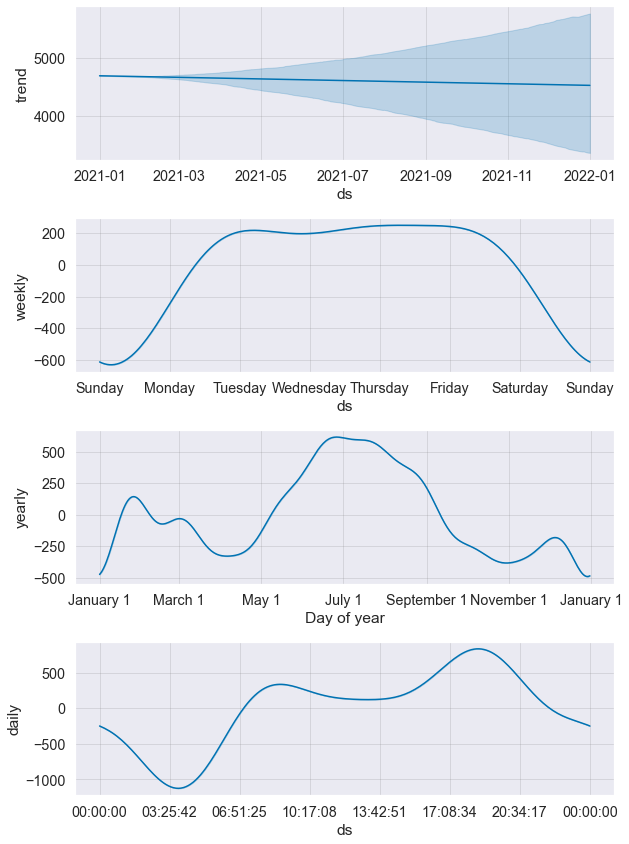

In [9]:
fig = model.plot_components(demand_test_fcst)
fig.savefig('C:/Users/HP/Desktop/fig4.png')

### Compare the forecast part (blue) with the actual value, and the parts that do not coincide are represented in red

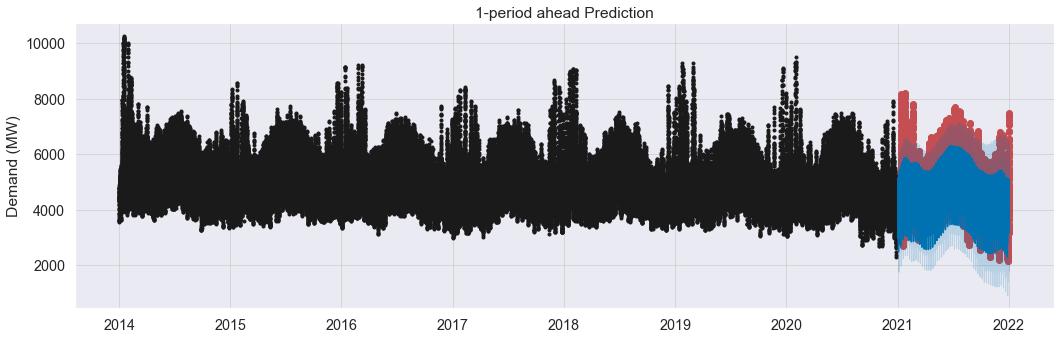

In [10]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(demand_test.index, demand_test, color='r')
fig = model.plot(demand_test_fcst, ax=ax)
ax.set_title('1-period ahead Prediction')
ax.set_ylabel('Demand (MW)')
ax.set_xlabel('')
plt.savefig('C:/Users/HP/Desktop/fig15.png')

In [11]:
mean_squared_error(y_true=demand_test,y_pred=demand_test_fcst['yhat'])

395313.04801410757

In [12]:
mean_absolute_error(y_true=demand_test,y_pred=demand_test_fcst['yhat'])

494.3320850799114

### Calculate MAPE

In [13]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=demand_test,y_pred=demand_test_fcst['yhat'])

10.936951453076341